# Exercise 1

Create a model using K-Nearest Neigbors to perform classification using the personality dataset.

0 -'introvert'

1 - 'extrovert'

## A. Import libraries

In [1]:
import sklearn
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import pandas as pd
import matplotlib.pyplot as plt


## B. Load and understand the dataset

Display the first 5 rows of the dataset using `.head()`

In [2]:
# put your answer here
df = pd.read_excel("./social.xlsx")
df.head()

,Name,Post/Share Frequency,Active,Replies to comments/msgs,No. Friends/Followers,Personality
0,Elizer,0,1,0,1000,1
1,Brian,1,1,0,928,0
2,Anhony,0,1,1,1600,1
3,Meliza,1,1,1,2400,1
4,Emmanuel,0,1,0,2500,0


Display the summary of all the features of the dataset using `.info()`

In [3]:
# put your answer here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Name                      104 non-null    object
 1   Post/Share Frequency      104 non-null    int64 
 2   Active                    104 non-null    int64 
 3   Replies to comments/msgs  104 non-null    int64 
 4   No. Friends/Followers     104 non-null    int64 
 5   Personality               104 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 5.0+ KB


Display the total number of samples from each label using `.value_counts()`

In [4]:
# put your answer here
df["Personality"].value_counts()

,count
Personality,
1,60
0,44


Use a histogram to display the number of followers for each samples
 - The x axis should be the number of followers/friends
 - The y axis should be the number of samples in the dataset

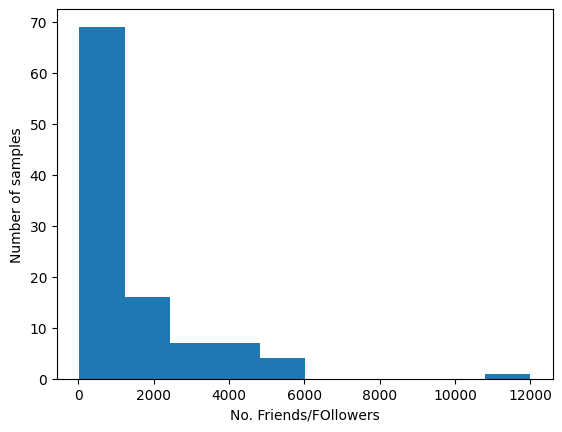

In [5]:
# put your answer here
plt.hist(df["No. Friends/Followers"])
plt.xlabel("No. Friends/FOllowers")
plt.ylabel("Number of samples")
plt.show()

Remove the name column using `drop()` method

In [6]:
# put your answer here
df.drop(columns="Name", inplace=True)
df.head()

,Post/Share Frequency,Active,Replies to comments/msgs,No. Friends/Followers,Personality
0,0,1,0,1000,1
1,1,1,0,928,0
2,0,1,1,1600,1
3,1,1,1,2400,1
4,0,1,0,2500,0


## C. Split the dataset into training and test set

Convert the features into an numpy array using `.values()` and store it in a variable "X"

In [7]:
# put your answer here
x = df.drop(columns=["Personality"]).values
print(x[0:5])

[[   0    1    0 1000]
 [   1    1    0  928]
 [   0    1    1 1600]
 [   1    1    1 2400]
 [   0    1    0 2500]]


Convert the labels into an numpy array using `.values()` and store it in a variable "y"

In [8]:
# put your answer here
y =df["Personality"].values
print(y[0:5])

[1 0 1 1 0]


Use `train_test_split()` to split the data.

- Declare a variable `X_train` that will hold the training data
- Declare a variable `X_test` that will hold the test data
- Declare a variable `y_train` that will hold the label of the training data
- Declare a variable `y_test` that will hold the label of the test data


In [9]:
# put your answer here

x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=1 )

Display the dimensions of each variables using `.shape()`

In [10]:
# put your answer here
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(83, 4)
(83,)
(21, 4)
(21,)


## D. Create the model

Use KNN as a classifier by using `KNeighborsClassifier()`

In [11]:
# put your answer here
knn = KNeighborsClassifier(n_neighbors=19)

Train the model using the `.fit()`

In [12]:
# put your answer here
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=19)

Test the model using the `.predict()`

In [13]:
# put your answer here
y_pred = knn.predict(x_test)

## E. Evaluate the model

Create a confusion matrix

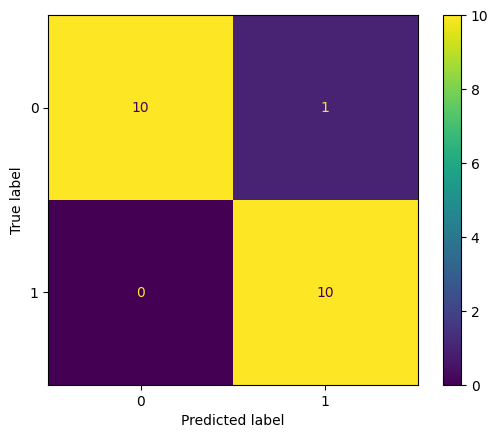

In [14]:
# put your answer here
conf_matrix = confusion_matrix(y_pred, y_test, labels=knn.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                              display_labels=knn.classes_)
disp.plot()

Display the accuracy

In [15]:
# put your answer here
metrics.accuracy_score(y_test, y_pred)

0.9523809523809523

Display the precision

In [16]:
# put your answer here
precision = precision_score(y_test, y_pred, average=None)
print("Precision:", precision)

Precision: [0.90909091 1.        ]


Display the recall

In [17]:
# put your answer here
recall = recall_score(y_test, y_pred, average=None)
print("Recall:", recall)


Recall: [1.         0.90909091]


Display the f1-score

In [18]:
# put your answer here

f1 = f1_score(y_test, y_pred, average=None)
print("f1-score:", f1)


f1-score: [0.95238095 0.95238095]


## F. Predict your own personality

Enter your own features and use the model to generate a prediction using `.predict()`

In [19]:
# put your answer here
knn.predict([[0, 1, 1, 3700]])

array([1])